# ADAML, machine learning: workshop 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import re
import re
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\niemelav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Initialize NLTK resources
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# 0. Data importing and preprocessing

In [3]:
df = pd.read_csv("df_file.csv")

print(df.head())

print(df.isnull().sum()) # checking whether data contains any nulls

                                                Text  Label
0  Budget to set scene for election\n \n Gordon B...      0
1  Army chiefs in regiments decision\n \n Militar...      0
2  Howard denies split over ID cards\n \n Michael...      0
3  Observers to monitor UK election\n \n Minister...      0
4  Kilroy names election seat target\n \n Ex-chat...      0
Text     0
Label    0
dtype: int64


No nulls!

Next: shuffling the data, since the classes are ordered in the original data:

In [4]:
df = df.sample(frac=1).reset_index(drop=True) 
df.head()

,Text,Label
0,BBC denies Blackadder TV comeback\n \n The BBC...,3
1,US TV host Clark suffers stroke\n \n Veteran U...,3
2,Software watching while you work\n \n Software...,2
3,BBC web search aids odd queries\n \n The BBC's...,2
4,Chelsea clinch cup in extra-time\n \n (after e...,1


Next: checking duplicates and dropping them if existing:

In [5]:
print(df.duplicated().sum())
df = df.drop_duplicates(ignore_index=True)
print(df.duplicated().sum())

print(df.isnull().sum())

98
0
Text     0
Label    0
dtype: int64


98 dublicates dropped

Next: defining a function which preprocesses the text

In [6]:
def clean_text(text):
    text = text.lower() # lowering the text
    text = re.sub(r'[^a-z\s]', '', text) # removes numbers, punctuations, uppercase letters and special symbols
    text = re.sub(r'\s+', ' ', text).strip() # collapses multiple spaces/tabs/newlines into one space and removes any spaces at the start or end
    words = text.split() # splitting text into words

    words = [lemmatizer.lemmatize(word) for word in words] # lemmatization

    words = [word for word in words if word not in stop_words] # stop-word removal

    return " ".join(words) # joining words and adding space between the words

In [7]:
df['new_text'] = df['Text'].apply(clean_text)

print("\nExample of cleaned text:")
print(df['new_text'].iloc[0])


Example of cleaned text:
bbc denies blackadder tv comeback bbc ha said plan pipeline new series hit comedy blackadder ended tony robinson played servant baldrick told itvs morning show star rowan atkinson wa keen ha past robinson added would love another series wa set different era ranging th century world war bbc said thursday plan comeback final series main character killed charging towards german line ordered trench poignant finale wa later voted best farewell episode tv series host uk actor including hugh laurie stephen fry miranda richardson also appeared show blackadder returned oneoff special filmed celebrate arrival millennium wa shown millennium dome greenwich screened bskyb


# 1. Data splitting

In [8]:
X = df["new_text"]
y = df["Label"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3) # test size = 20% of the data

# 3. Vectorization

Mapping words into integer IDs based on the frequency and vectorizing text to SEQUENCY_LENGTH length vectors of words integer IDs.

In [9]:
# Hyperparameters for Keras Vectorization
MAX_TOKENS = 65553 # = how many unique words to keep
SEQUENCE_LENGTH = 150 # longer texts are truncated and shorter texts are padded

# Initialize TextVectorization layer
vectorizer = layers.TextVectorization(
    max_tokens=MAX_TOKENS,
    output_mode="int", # outputs integer indices for words
    output_sequence_length=SEQUENCE_LENGTH
)

# Adapt the vectorizer to the training data
vectorizer.adapt(X_train) # building a mapping from words to integer IDs based on frequency

# Convert text data to sequences of integers
X_train_seq = vectorizer(X_train)
X_test_seq = vectorizer(X_test)

print(f"Shape of Keras sequences (Training): {X_train_seq.shape}")

Shape of Keras sequences (Training): (1701, 150)


In [10]:
X_train_seq

<tf.Tensor: shape=(1701, 150), dtype=int64, numpy=
array([[ 4418,  2699, 14366, ...,     0,     0,     0],
       [ 2266,   621,   542, ...,   649,  2642,  9028],
       [  726,  1459,   109, ...,     3,  3668,   119],
       ...,
       [  221,    71,   221, ...,    20,   623,  1897],
       [ 1686,  4177,    10, ...,   270,  1285,  1469],
       [11585, 13113,    59, ...,     0,     0,     0]], dtype=int64)>

# 4. Embedding and model training

Mapping each token ID (= word ID) to a dense vector of size 128. The model used is vanilla RNN (= each hidden state is calculated with tanh-function) with 64 hidden units. The activation function for the output layer used is softmax. For the evaluation accuracy score is used (= how many correct labels).

Epoch 1/100


C:\Users\niemelav\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.2963 - loss: 1.5599 - val_accuracy: 0.3732 - val_loss: 1.4236
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.8642 - loss: 0.7049 - val_accuracy: 0.5376 - val_loss: 1.0956
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.9941 - loss: 0.1123 - val_accuracy: 0.5141 - val_loss: 1.1730
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 1.0000 - loss: 0.0253 - val_accuracy: 0.4953 - val_loss: 1.2042
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 1.0000 - loss: 0.0117 - val_accuracy: 0.5094 - val_loss: 1.2301
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.5141 - val_loss: 1.2425
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.5141 - val_loss: 1.2726
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.5023 - val_l

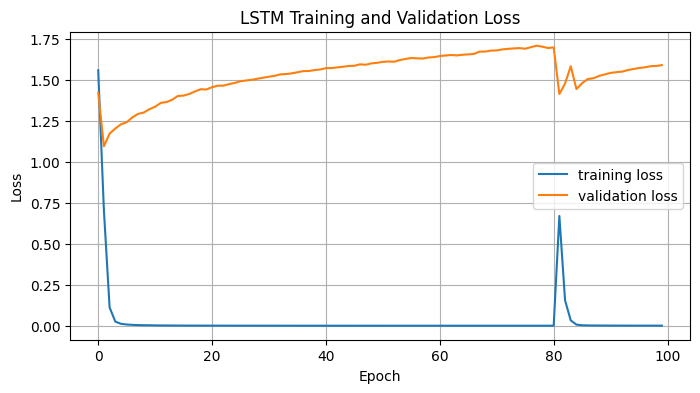

In [11]:
embedding_dim = 130  # each word will be presented as a 128-dimensional vector
num_classes = 5      # number of target classes

model = keras.Sequential([
    # Input: integer token sequences from your vectorizer
    layers.Embedding(
        input_dim=MAX_TOKENS, 
        output_dim=embedding_dim, 
        mask_zero=True,           # mask padding zeros
        input_length=SEQUENCE_LENGTH
    ),

    # 🔹 Simple Recurrent Layer (Vanilla RNN)
    layers.SimpleRNN(64, return_sequences=False), # outputs only the final hidden state

    # Output layer — softmax for 5 classes
    layers.Dense(num_classes, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",  # integer labels
    optimizer="adam", # adaptive learning rate optimizer
    metrics=["accuracy"]
)

EPOCHS = 100
BATCH_SIZE = 25

history = model.fit(
    X_train_seq, y_train,
    validation_data=(X_test_seq, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

plt.figure(figsize=(8, 4))
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LSTM Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# 6. Testing

In [12]:
print("\n--- RNN Model Final Evaluation ---")
loss, acc = model.evaluate(X_test_seq, y_test, verbose=1)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {acc:.4f}")


--- RNN Model Final Evaluation ---
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5235 - loss: 1.5917
Loss: 1.5917
Accuracy: 0.5235


Pretty bad accuracy! Most probably too simple model. Should try LSTM and/or transformer.